# 解答例：Week2 授業前課題4 ダーツ投げ問題

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

### 【問題1】ダーツのまとを選ぶ

ダーツのまとを選ぶためにサイコロを実装しましょう。

《ヒント》

「サイコロを振る」動作を表現するのにnp.random.choice()を用います。こうすることで配列の中からランダムに要素を1つ選ぶことができます。

（解説）

np.random.choice()に配列を渡すと、その中からランダムにどれかが選ばれます。

In [2]:
dice_indexes = [1,2,3,4,5,6]
dice_choice = np.random.choice(dice_indexes)
print("サイコロの目：{}".format(dice_choice))

サイコロの目：3


### 【問題2】ダーツを投げて、刺さった場所を記録する

ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

（解説）

np.random.normal()を2つまたはnp.random.multivariate_normalを用いて正規分布を発生させます。

まとを横方向に並べたいため、x方向の中心（平均）をサイコロの番号とします。

In [3]:
# np.random.normal()の場合
x_loc = np.random.normal(loc=dice_choice, scale=0.1)
y_loc = np.random.normal(loc=0, scale=0.1)

loc = np.array([x_loc, y_loc])

print("刺さった場所：{}".format(loc))

刺さった場所：[3.02462004 0.09962107]


In [4]:
# np.random.multivariate_normal()の場合
mean = [dice_choice, 0]
cov = [[0.01,0],[0,0.01]]
loc = np.random.multivariate_normal(mean, cov)
print("刺さった場所：{}".format(loc))

刺さった場所：[3.00448081 0.16072035]


### 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する

ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。 問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

（解説）

ダーツを投げる回数分のfor文とします。

空のディクショナリを作っておき、新しいサイコロの目が出てくるごとに新たにkeyを作成しndarrayをvalueにします。既にkeyを作成済みの目の場合はndarrayを結合（np.concatenate()）します。

valueをどのような形にするかはいろいろと考えられますが、模範解答では問題4でmatplotlibが扱いやすいようにndarrayにまとめています。

In [5]:
n_darts = 1000

darts_locs_dic = {}
dice_indexes = [1,2,3,4,5,6]

for i in range(n_darts):
    dice_choice = np.random.choice(dice_indexes)
    x_loc = np.random.normal(loc=dice_choice, scale=0.1)
    y_loc = np.random.normal(loc=0, scale=0.1)
    if  dice_choice in darts_locs_dic:
        darts_locs_dic[dice_choice] = np.concatenate((darts_locs_dic[dice_choice], [[x_loc, y_loc]]))
    else:
        darts_locs_dic[dice_choice] = np.array([[x_loc, y_loc]])

### 【問題4】ダーツのまとと刺さった位置を描画する

問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

（解説）

ダーツが刺さった場所はplt.scatter()を用いて散布図として描くことができます。まとの円はpatches.Circle()を利用します。

matplotlibのコードはいろいろな書き方が行えますが、模範解答ではfor文でkeyを順番に取り出し、それぞれに対し散布図と円を描いていくようにしています。

範囲も指定することで綺麗な図になります。

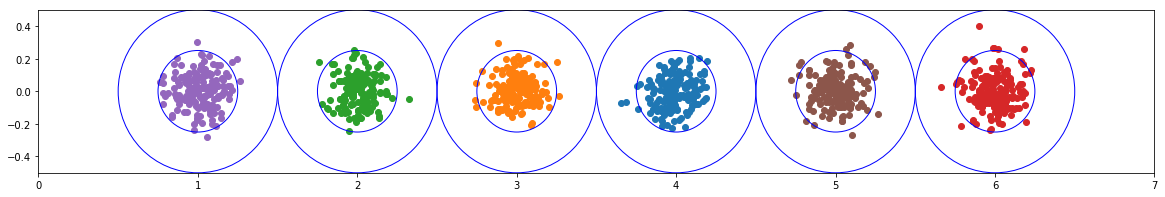

In [6]:
plt.figure(figsize=(20, 3))
ax = plt.axes()
for key in darts_locs_dic.keys():
    plt.scatter(darts_locs_dic[key][:, 0], darts_locs_dic[key][:, 1])
    circle1 = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    circle2 = patches.Circle(xy=(key, 0), radius=0.25, ec='b', fill=False)
    ax.add_patch(circle1)
    ax.add_patch(circle2)
ax.set_xlim(0, 7)
ax.set_ylim(-0.5, 0.5)
plt.show()

### 【問題5】関数化

ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

（解説）

問題1から4のどの部分がダーツを投げる回数やまとの数によって変わってくるかを考え、変数で置き換えていきます。

図の大きさや範囲なども変化するようにすることで綺麗な結果が得られます。いくつかの数値で実験して正しく動いているかを確認するようにしましょう。

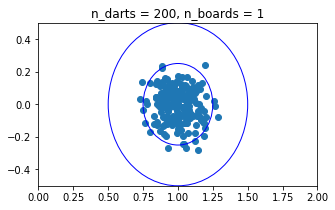

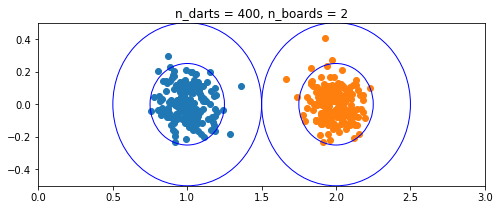

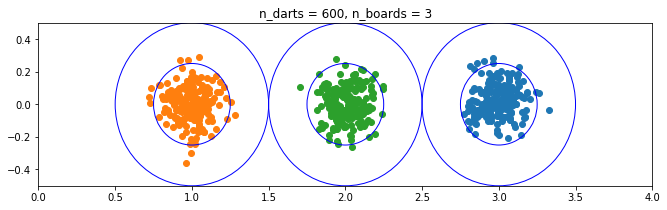

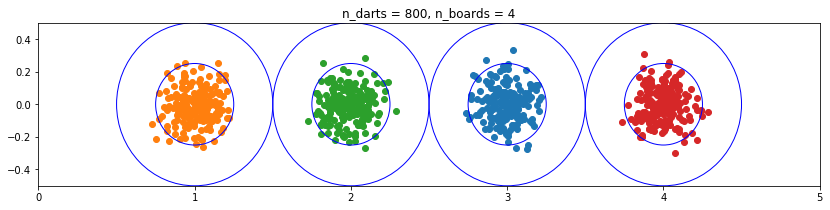

In [7]:
def darts(n_darts=1000, n_boards=6):
    """
    ダーツのシミュレーション
    
    Parameters
    ----------------
    n_darts : int
        ダーツを投げる回数 (defalut : 1000)
    n_boards : int
        ダーツのまとの数 (default : 6)
    """
    
    darts_locs_dic = {}
    dice_indexes = list(range(1, n_boards+1))

    for i in range(n_darts):
        dice_choice = np.random.choice(dice_indexes)
        x_loc = np.random.normal(loc=dice_choice, scale=0.1)
        y_loc = np.random.normal(loc=0, scale=0.1)
        if  dice_choice in darts_locs_dic:
            darts_locs_dic[dice_choice] = np.concatenate((darts_locs_dic[dice_choice], [[x_loc, y_loc]]))
        else:
            darts_locs_dic[dice_choice] = np.array([[x_loc, y_loc]])
        
    plt.figure(figsize=(n_boards*3+2, 3))
    ax = plt.axes()
    for key in darts_locs_dic.keys():
        plt.scatter(darts_locs_dic[key][:, 0], darts_locs_dic[key][:, 1])
        circle1 = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        circle2 = patches.Circle(xy=(key, 0), radius=0.25, ec='b', fill=False)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
    ax.set_title("n_darts = {}, n_boards = {}".format(n_darts, n_boards))
    ax.set_xlim(0, n_boards+1)
    ax.set_ylim(-0.5, 0.5)
    plt.show()
    
# 実験
for n in range(1, 5):
    darts(n_darts=n*200, n_boards=n)